# Data preparation and visualization for the Iris dataset

In this Jupyter notebook we are going to make some preparations and visualizations on the already available iris dataset in R. We need the preperations for further predictions later on. First we save the iris set as data and get a look at the first few rows.

In [20]:
data = iris
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


The dataset consists of 5 continuous variables named Sepal.Length, Sepal.Width, Petal.Length, Petal.Width and a factor variable called Species. The aim is to predict the Species for a given vector which contains the other 4 variables. The measurements are all given in centimeters, so no further scaling is necessary. For more informations about the iris dataset call ?iris in the R command line. To better understand the data we do some quick and powerful visualizations.

# Visualization

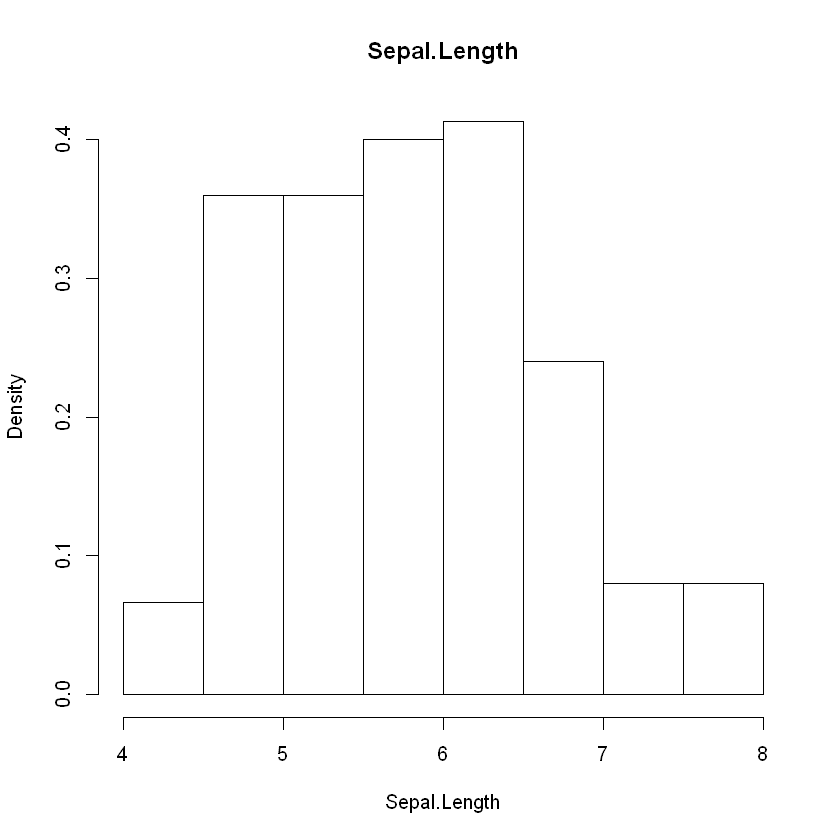

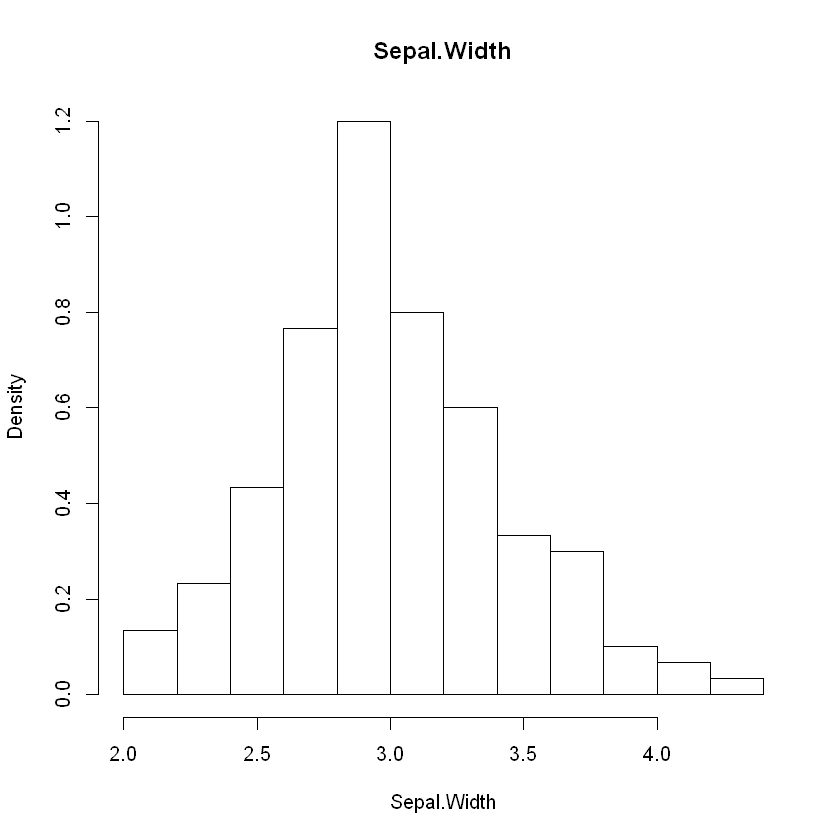

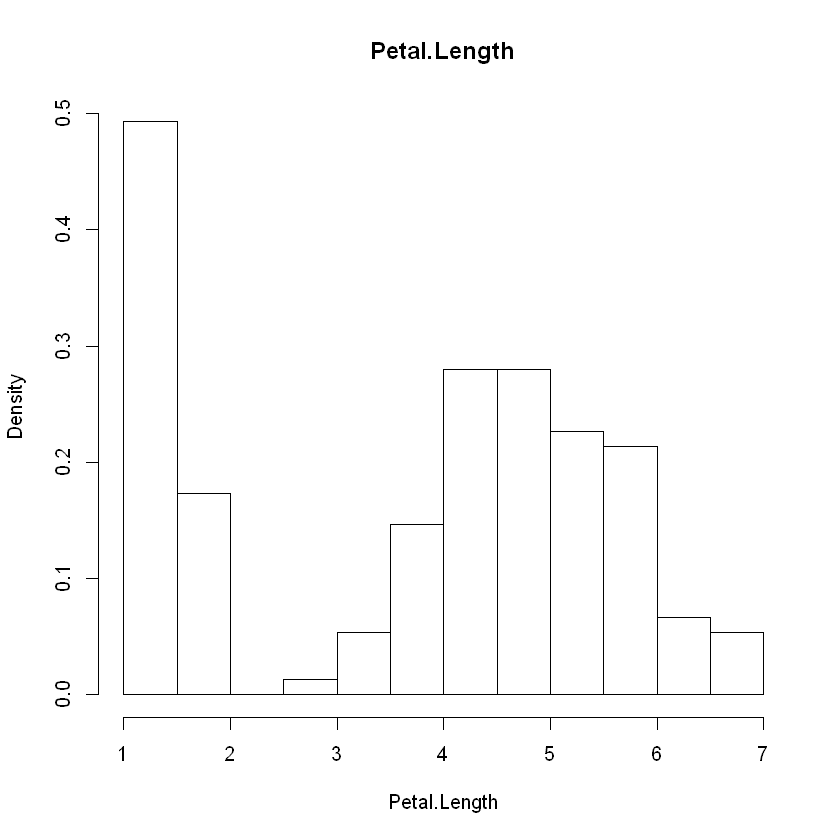

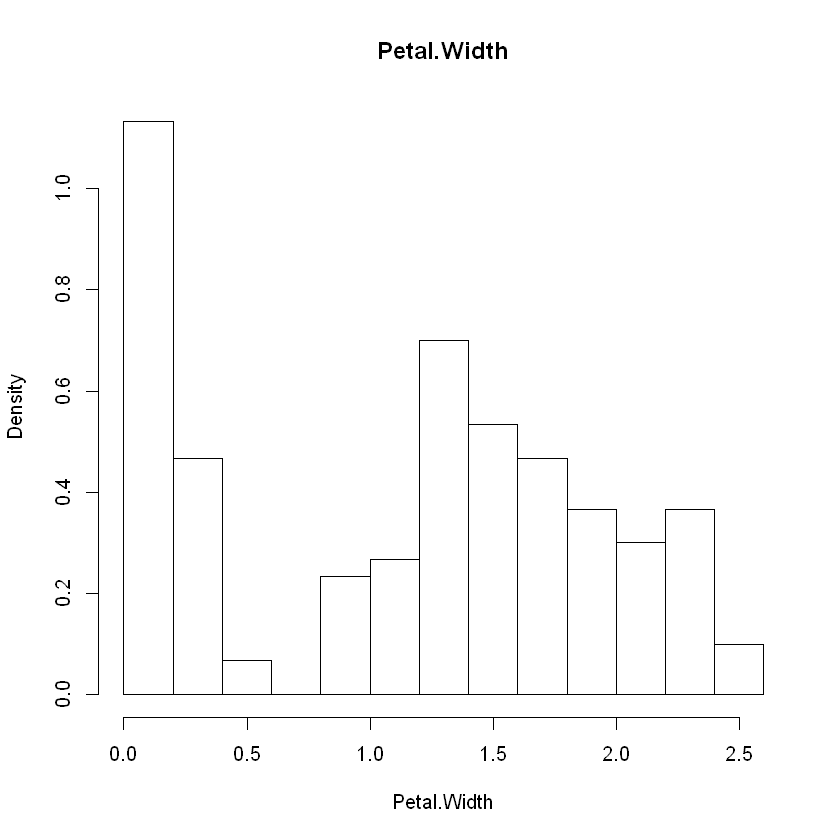

In [21]:
hist(iris[,1],xlab='Sepal.Length',main='Sepal.Length',freq=FALSE)
hist(iris[,2],xlab='Sepal.Width',main='Sepal.Width',freq=FALSE)
hist(iris[,3],xlab='Petal.Length',main='Petal.Length',freq=FALSE)
hist(iris[,4],xlab='Petal.Width',main='Petal.Width',freq=FALSE)

The histogram is a common tool to get a look at the distribution of your data. We can see that Sepal.Length and Sepal.Width are nearly normally distributed. Histograms can only be produced for numerical variables, so we exclude Species. Next we produce scatter plots to get to know the correlations between two features.

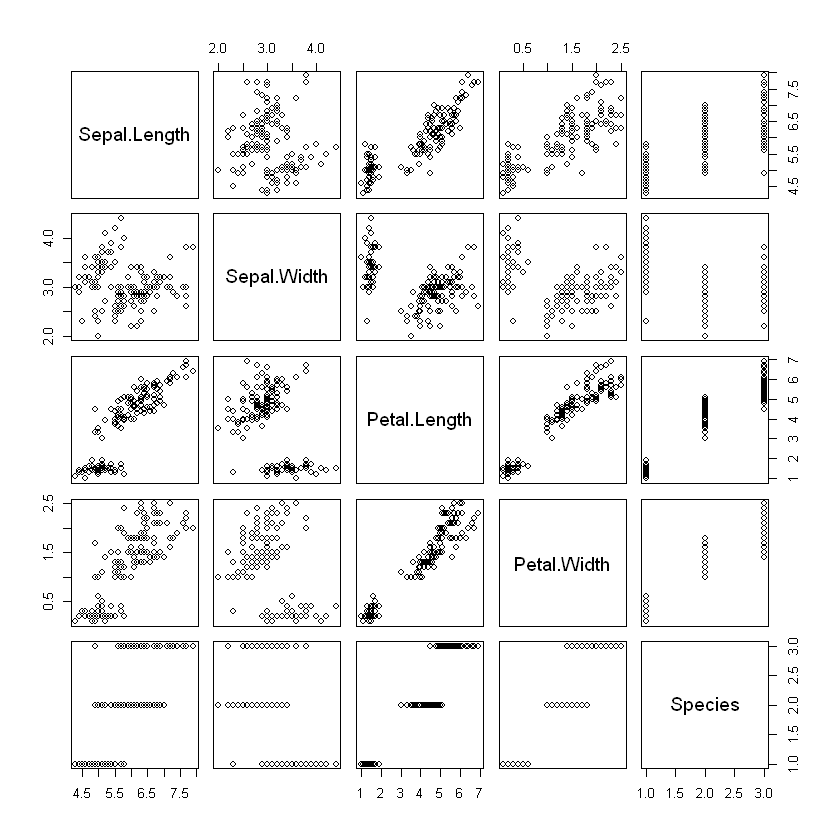

In [22]:
pairs(iris)

What we can see is that between Petal.Width and Petal.Length there is a nearly linear dependence. We can further see that for every given Species the other four variables are highly different (can be tested with a MANOVA). This is a very important fact for other prediction later on! To get a grip on your data the following two functions are also quite commonly used.

In [23]:
str(data)
summary(data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

What we can see is that our data consists of 150 data points. We further have exactly equal number of data points for every given factor of Species. Class imbalance could be problematic but we don't have to worry about this here.

It has to be mentioned that this dataset has ideal conditions for prediction, which happens hardly. In general a lot of preparations and imputations are necessary to get clean data.

# Preparation

What we need to do now is split our data into train and test datasets. The train data consists of the rows on which we want to train our machine learning algorithm and the test data consists of the rows which we want to predict the Species. Therefore we have to install the package caTools with install.packages("caTools"). I have it already installed, so I only have to load it with library(caTools). With the function sample.split() we label every element of the Species column with TRUE or FALSE, where TRUE indicates training data and FALSE indicates test data. The SplitRatio can be variied but 0.7 is common. The function set.seed() is used so that the results can be reproduced. We produce two different datasets data_test and data_test_labeled to compare our prediction later on with the true labels.

In [49]:
library(caTools)
set.seed(2)
s = sample.split(data[,5],SplitRatio = 0.7)
data_train = data[s,]
data_test = data[!s,]